# Задание 1

На основе имеющихся данных предоставьте в удобном для вас формате прогноз рекламного
заработка до 30.09.2024.
Во сколько раз накопительный доход к 30-му дню будет больше дохода в день установки игры?

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [127]:
data = pd.read_csv('revenue.csv')
data.drop(['user_id'], axis=1, inplace=True)
data.columns = ['install', 'event', 'revenue']

data.head()

,install,event,revenue
0,2024-09-01,2024-09-01,0.128428
1,2024-09-01,2024-09-01,0.025017
2,2024-09-01,2024-09-01,0.047368
3,2024-09-01,2024-09-01,0.053080
4,2024-09-01,2024-09-01,0.023026


#### Доход по дням за первую неделю и процентное изменение

In [128]:
day_revenue = pd.DataFrame(data.groupby(['event'])['revenue'].sum()).reset_index()

day_revenue['event'] = pd.to_datetime(day_revenue['event']).dt.day
day_revenue.rename({'event': 'day'}, inplace=True, axis=1)

day_revenue['revenue'] = np.round(day_revenue['revenue'], 1)

day_revenue['change'] = np.round(day_revenue['revenue'].pct_change() * 100, 1)
day_revenue['change'].fillna(0, inplace=True)

day_revenue

,day,revenue,change
0,1,1214.5,0.0
1,2,497.4,-59.0
2,3,293.1,-41.1
3,4,184.1,-37.2
4,5,154.1,-16.3
5,6,140.7,-8.7
6,7,142.9,1.6


<Axes: xlabel='day', ylabel='revenue'>

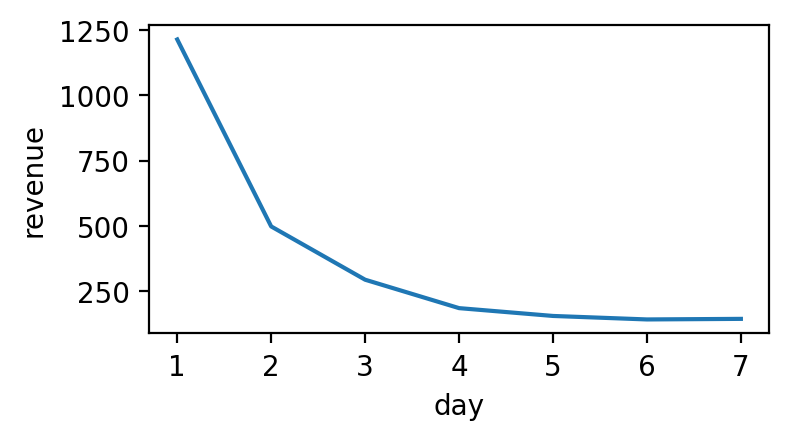

In [129]:
plt.figure(figsize=(4, 2))
sns.lineplot(x=day_revenue.day, y=day_revenue.revenue)

Учитывая процентное изменение прибыли, можно заметить (по имеющимся данным), что после установки, прибыль стремится к ~140.7 - 142.9, т.е примерное среднее значение прибыли по всем остальным дням будет находится в этом диапозоне.

In [130]:
other_days_revenue = np.mean(day_revenue['revenue'].iloc[-2:])
other_days_revenue

141.8

## Итоговый заработок за месяц

In [131]:
month_revenue = day_revenue['revenue'].sum() + (30 - len(day_revenue)) * other_days_revenue
month_revenue

5888.2

In [132]:
np.round(month_revenue / day_revenue['revenue'].iloc[0], 2)

4.85

### Ожидаемый доход за месяц - 5888, что почти в 5 раз больше чем в первый день установки игры

# Задание 2

Какие проекты являются основными конкурентами? Почему

### Основными конкурентами Rescue Dash могут быть игры такие как: Heart's Medicine, Hospital Frenzy, Hospital Story, Hotel Fever Tycoon и т.п.
### Так как имеют очень схожую механику игры - сбор ресурсов с ограниченным временем в мультяшном стиле. А так же схожуй детскую аудиторию.